# Анализ изменений спроса и поведения пользователей Яндекс Афиша: осень 2024

- Автор: Волкова Карина
- Дата: 26.06.2025

### Цели и задачи проекта:

**Цель:** Провести исследовательский анализ данных сервиса Яндекс Афиша за осень 2024 года для выявления изменений в пользовательских предпочтениях и популярности событий, а также для проверки гипотез о различиях в поведении пользователей мобильных и стационарных устройств. Результаты анализа помогут продуктовой команде понять влияние сезонности и особенности аудитории, а также подготовиться к зимним распродажам и новогодним акциям.

**Задачи:**
- Исследовать динамику продаж билетов по категориям событий и временным периодам осени 2024 года.
- Определить влияние сезонности на спрос и пользовательские предпочтения.
- Проанализировать изменения в составе аудитории и выявить новые тенденции в поведении пользователей.
- Выявить наиболее популярные мероприятия, организаторов и площадки по объему продаж и посещаемости.
- Сравнить активность и предпочтения пользователей мобильных и стационарных устройств.
- Рассчитать ключевые метрики: среднюю выручку с заказа и среднюю цену билета.
- Визуализировать результаты анализа в аналитическом дашборде для удобного мониторинга и принятия решений.

### Описание данных

<font color='#777778'> Датасет **final_tickets_orders_df.csv** содержит информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. 
- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.
- `days_since_prev`- количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

Датасет **final_tickets_events_df.csv** содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия (из данных исключены фильмы).
- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.

Датасет **final_tickets_tenge_df.csv** с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. 
- `nominal` — номинал (100 тенге).
- `data` — дата.
- `curs` — курс тенге к рублю.
- `cdx` — обозначение валюты (kzt).</font>

### Содержимое проекта

1. Загрузка данных и знакомство с их содержимым.
2. Ппредобработка данных.
3. Исследовательский анализ данных.
4. Статистический анализ данных.
5. Общий вывод и рекомендации

## 1. Загрузка данных и знакомство с ними

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu, shapiro

In [2]:
orders = pd.read_csv('')

In [3]:
orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

В датафрейме 290 849 строк и 14 столбцов. Они охватывают идентификаторы заказов и пользователей, временные метки, характеристики событий, информацию о пользователях и устройствах, а также финансовые показатели.

- Все столбцы заполнены полностью, кроме столбца days_since_prev — в нём 268 909 непустых значений, значит пропущено около 22 000 строк. days_since_prev отражает дни с предыдущего заказа, пропуск - для первого заказа пользователя значение отсутствует.
- Типы данных в целом соответствуют ожидаемым: идентификаторы — строки или числа, даты — строковые, которые необходимо преобразовать в datetime, числовые значения — float или int.
- Временные столбцы created_dt_msk и created_ts_msk представлены как строки, для анализа нужно будет преобразовать их в datetime.

В целом, данные выглядят корректными и соответствуют описанию. Требуется стандартная предобработка: преобразование дат в datetime, обработка пропусков в days_since_prev, проверки на дубликаты и аномалии, а также стандартизация категориальных признаков. 

In [5]:
events = pd.read_csv('')

In [6]:
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [7]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


В датафрейме 22 427 строк и 11 столбцов. Столбцы содержат идентификаторы событий, названия, описания типов, организаторов, а также географические и локационные данные.

- Все столбцы заполнены полностью, пропусков нет.
- Типы данных соответствуют ожидаемым: идентификаторы — целочисленные, остальные — строковые.
- Названия событий и описания типов представлены в текстовом формате, что соответствует их содержанию.
- Географические данные содержат как числовые идентификаторы (city_id, venue_id), так и текстовые названия, что удобно для группировок и объединений.
- Каждый event_id описан полным набором атрибутов.

Структура и содержимое соответствуют описанию, все ключевые признаки присутствуют и заполнены. Для подготовки данных к анализу необходимо проверить уникальность идентификаторов, стандартизировать и очистить текстовые поля, проверить согласованность географической информации.

In [8]:
tenge= pd.read_csv('')

In [9]:
display(tenge.head())
display(tenge.info()) 

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


None

В датафрейме 357 строк и 4 столбца.

Все строки заполнены, пропусков нет.
- data — тип object, содержит даты в формате "YYYY-MM-DD", но не в datetime, требует преобразования.

## 2. Предобработка данных и подготовка их к исследованию

In [10]:
# Преобразуем даты
orders['created_dt_msk'] = pd.to_datetime(orders['created_dt_msk'])
orders['created_ts_msk'] = pd.to_datetime(orders['created_ts_msk'])
tenge['data'] = pd.to_datetime(tenge['data'])

# Размеры датафреймов до объединения
print(f"Размер orders: {orders.shape}")
print(f"Размер events: {events.shape}")

# Объединим Orders и Events
df = orders.merge(events, on='event_id', how='left')

# Проверим размер дф после объединения
print(f"Размер объединенного df: {df.shape}")

display(df.head())

Размер orders: (290849, 14)
Размер events: (22427, 11)
Размер объединенного df: (290849, 24)


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [11]:
# Посмотрим количество пропусков по всем столбцам
missing_counts = df.isna().sum()
missing_ratios = df.isna().mean()

# Отфильтруем только столбцы с пропусками
missing = missing_counts[missing_counts > 0]

print("Пропуски по столбцам:")
print(pd.DataFrame({'count': missing, 'ratio': missing_ratios[missing.index]}))

print(f"\nВсего строк: {len(df)}")

Пропуски по столбцам:
                        count     ratio
days_since_prev         21940  0.075434
event_name                238  0.000818
event_type_description    238  0.000818
event_type_main           238  0.000818
organizers                238  0.000818
region_name               238  0.000818
city_name                 238  0.000818
city_id                   238  0.000818
venue_id                  238  0.000818
venue_name                238  0.000818
venue_address             238  0.000818

Всего строк: 290849


238 пропусков это очень маленькая доля от общего числа строк (около 0.08%). Удалим их.

In [12]:
# Удалим пропуски
cols_with_missing = [
    'event_name', 'event_type_description', 'event_type_main', 'organizers',
    'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name', 'venue_address'
]

df_clean = df.dropna(subset=cols_with_missing).reset_index(drop=True)

print(f"Размер данных до удаления: {len(df)}")
print(f"Размер данных после удаления: {len(df_clean)}")
print(f"Удалено строк: {len(df) - len(df_clean)}")

Размер данных до удаления: 290849
Размер данных после удаления: 290611
Удалено строк: 238


In [13]:
# Анализ категориальных переменных на очищенных данных
cat_cols = ['currency_code', 'device_type_canonical', 'service_name', 'cinema_circuit',
            'event_type_description', 'event_type_main', 'organizers', 'region_name', 'city_name', 'venue_name']

for col in cat_cols:
    print(f"\nКатегории в {col}:")
    print(df_clean[col].value_counts(dropna=False).head(10))

# Нормализация: приведем device_type_canonical к нижнему регистру и уберем пробелы
df_clean['device_type_canonical'] = df_clean['device_type_canonical'].str.lower().str.strip()


Категории в currency_code:
rub    285542
kzt      5069
Name: currency_code, dtype: int64

Категории в device_type_canonical:
mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64

Категории в service_name:
Билеты без проблем    63519
Лови билет!           41124
Билеты в руки         40343
Мой билет             34839
Облачко               26642
Лучшие билеты         17774
Весь в билетах        16849
Прачечная             10273
Край билетов           6207
Тебе билет!            5228
Name: service_name, dtype: int64

Категории в cinema_circuit:
нет           289213
Другое          1261
КиноСити         122
Москино            7
Киномакс           7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

Категории в event_type_description:
концерт                   112049
событие                    58605
спектакль                  50592
шоу                        13626
спорт                      12837
мюзикл                      9919
спортивное мероприятие      907

Видно, что большинство пользователей используют валюту RUB, что соответствует основной географии проекта — России, при этом присутствует небольшая часть аудитории из Казахстана. 

По устройствам доминирует mobile, что важно учитывать при разработке интерфейсов и маркетинговых кампаний для улучшения пользовательского опыта. 

Сервисы распределены достаточно равномерно, однако выделяются несколько лидирующих площадок, что может помочь в оптимизации каналов продаж. 

Большинство событий относятся к концертам и театру, отражая основные направления мероприятий и интересы аудитории. 

Региональное распределение и распределение по городам показывает концентрацию активности в нескольких ключевых локациях, что важно учитывать при планировании локальных маркетинговых и организационных стратегий.

Количество заказов в рублях: 285542
Количество заказов в тенге: 5069


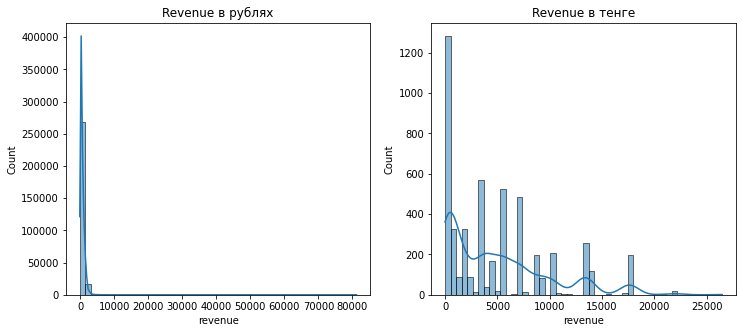

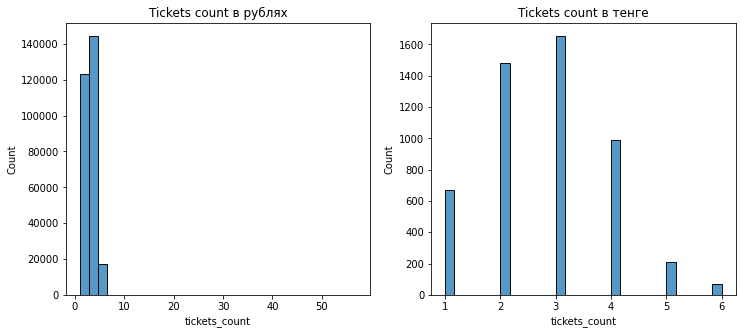

In [14]:
# Анализ количественных переменных revenue и tickets_count с учетом валют на очищенных данных
df_rub = df_clean[df_clean['currency_code'] == 'rub'].copy()
df_kzt = df_clean[df_clean['currency_code'] == 'kzt'].copy()

print(f"Количество заказов в рублях: {len(df_rub)}")
print(f"Количество заказов в тенге: {len(df_kzt)}")

# Гистограммы распределения revenue
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_rub['revenue'], bins=50, kde=True)
plt.title('Revenue в рублях')

plt.subplot(1,2,2)
sns.histplot(df_kzt['revenue'], bins=50, kde=True)
plt.title('Revenue в тенге')
plt.show()

# Гистограммы распределения tickets_count
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_rub['tickets_count'], bins=30, kde=False)
plt.title('Tickets count в рублях')

plt.subplot(1,2,2)
sns.histplot(df_kzt['tickets_count'], bins=30, kde=False)
plt.title('Tickets count в тенге')
plt.show()

Основная часть данных приходится на рублевые заказы (285 542), а в тенге — существенно меньше (5 069), что говорит о доминировании российского рынка в выборке.


- Revenue в рублях: Распределение сильно скошено вправо, с большим числом малых значений и длинным "хвостом" редких крупных доходов. Это типично для финансовых данных, где большинство заказов имеют невысокую выручку, а крупные заказы встречаются редко.

- Revenue в тенге: Распределение более разреженное и с пиками на отдельных значениях, возможно, из-за меньшего объёма данных и специфики рынка.

- Tickets count в рублях: Большинство заказов имеют небольшое количество билетов, с резким спадом при увеличении количества. Это говорит о том, что чаще покупают по 1-2 билета.

- Tickets count в тенге: Распределение более дискретное и менее гладкое, опять же из-за меньшего объёма и, возможно, особенностей поведения покупателей.


Наблюдается классическое распределение финансовых показателей с преобладанием небольших значений и редкими крупными заказами.

In [15]:
# Рассчитаем 99-й перцентиль revenue для каждой валюты на очищенных данных
rub_99 = df_rub['revenue'].quantile(0.99)
kzt_99 = df_kzt['revenue'].quantile(0.99)

print(f"99-й перцентиль revenue в рублях: {rub_99}")
print(f"99-й перцентиль revenue в тенге: {kzt_99}")

# Фильтрация данных по 99-му перцентилю для каждой валюты
df_filt = df_clean[
    ((df_clean['currency_code'] == 'rub') & (df_clean['revenue'] <= rub_99)) |
    ((df_clean['currency_code'] == 'kzt') & (df_clean['revenue'] <= kzt_99))
].copy()

print(f"Размер после фильтрации выбросов: {len(df_filt)}")


99-й перцентиль revenue в рублях: 2570.8
99-й перцентиль revenue в тенге: 17617.24
Размер после фильтрации выбросов: 287782


- 99-й перцентиль выручки (revenue) в рублях равен примерно 2570.8, что означает, что 99% заказов в рублях имеют выручку ниже или равную этому значению. Заказы с выручкой выше этого порога считаются выбросами и исключены из анализа.

- 99-й перцентиль выручки в тенге составляет около 17617.24, что аналогично отражает верхний порог для большинства заказов в тенге.

- После применения фильтрации по 99-м перцентилям размер выборки сократился до 287 782 заказов. Это говорит о том, что удалено относительно небольшое количество экстремальных заказов (выбросов), что позволяет получить более чистые и стабильные данные для дальнейшего анализа.

Фильтрация по 99-му перцентилю помогает избавиться от редких, но очень крупных заказов, которые могут искажать статистику и модели. При этом сохраняется большая часть данных, особенно по рублям, что обеспечивает надежность последующих выводов и прогнозов.

In [16]:
# Проверим на явные дубликаты
num_duplicates = df_filt.duplicated().sum()
print(f"Явных дубликатов в df_filt: {num_duplicates}")

# Проверка неявных дубликатов по ключевым полям 
subset_cols = [col for col in df_filt.columns if col != 'order_id']
num_duplicates = df_filt.duplicated(subset=subset_cols).sum()
print(f"Неявных дубликатов по всем признакам, кроме order_id: {num_duplicates}")

# Удалим неявные дубликаты, оставляя первое вхождение
df_filt = df_filt.drop_duplicates(subset=subset_cols)

Явных дубликатов в df_filt: 0
Неявных дубликатов по всем признакам, кроме order_id: 30


Явные дубликаты отсутствуют, неявные удалены.

In [17]:
# Оптимизируем типы данных
df_filt['tickets_count'] = df_filt['tickets_count'].astype('int16')
df_filt['age_limit'] = df_filt['age_limit'].astype('int8')
df_filt['revenue'] = df_filt['revenue'].astype('float32')
df_filt['total'] = df_filt['total'].astype('float32')

In [18]:
# Переимуем столбцы
tenge = tenge.rename(columns={'data': 'date', 'curs': 'tenge_to_rub_rate'})

# Приведем к типу date (без времени)
tenge['date'] = tenge['date'].dt.date

df_filt['order_date'] = df_filt['created_dt_msk'].dt.date
df_filt = df_filt.merge(tenge[['date', 'tenge_to_rub_rate']], left_on='order_date', right_on='date', how='left')
df_filt['tenge_to_rub_rate'] = df_filt.apply(lambda x: x['tenge_to_rub_rate'] if x['currency_code']=='kzt' else 1, axis=1)
df_filt['revenue_rub'] = df_filt.apply(
    lambda x: x['revenue'] / 100 * x['tenge_to_rub_rate'] if x['currency_code']=='kzt' else x['revenue'], axis=1)

In [19]:
# Создание новых признаков
df_filt['one_ticket_revenue_rub'] = df_filt['revenue_rub'] / df_filt['tickets_count']
df_filt['month'] = df_filt['created_dt_msk'].dt.month

def season_from_month(m):
    if m in [12, 1, 2]:
        return 'зима'
    elif m in [3, 4, 5]:
        return 'весна'
    elif m in [6, 7, 8]:
        return 'лето'
    elif m in [9, 10, 11]:
        return 'осень'
    else:
        return np.nan

df_filt['season'] = df_filt['month'].apply(season_from_month)
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287752 entries, 0 to 287751
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287752 non-null  int64         
 1   user_id                 287752 non-null  object        
 2   created_dt_msk          287752 non-null  datetime64[ns]
 3   created_ts_msk          287752 non-null  datetime64[ns]
 4   event_id                287752 non-null  int64         
 5   cinema_circuit          287752 non-null  object        
 6   age_limit               287752 non-null  int8          
 7   currency_code           287752 non-null  object        
 8   device_type_canonical   287752 non-null  object        
 9   revenue                 287752 non-null  float32       
 10  service_name            287752 non-null  object        
 11  tickets_count           287752 non-null  int16         
 12  total                   287752

In [20]:
df_filt.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_id,venue_name,venue_address,order_date,date,tenge_to_rub_rate,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,2024-08-20,1.0,1521.939941,380.484985,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,2024-07-23,1.0,289.450012,144.725006,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,2024-10-06,1.0,1258.569946,314.642487,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,2024-07-13,1.0,8.490000,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,2024-10-04,1.0,1390.410034,463.470011,10,осень


В датафрейме *df_filt* теперь 31 столбец, все новые признаки заполнены без пропусков.

In [21]:
total_orders = len(df_clean)
filtered_orders = len(df_filt)
removed_orders = total_orders - filtered_orders
removed_ratio = removed_orders / total_orders * 100

print(f"Всего заказов до фильтрации: {total_orders}")
print(f"Заказов после фильтрации: {filtered_orders}")
print(f"Удалено заказов: {removed_orders} ({removed_ratio:.2f}%)")

Всего заказов до фильтрации: 290611
Заказов после фильтрации: 287752
Удалено заказов: 2859 (0.98%)


Была произведена обработка исходных таблиц заказов и событий, а также их объединение. Удалены пропуски в части признаков (около 0.08% строк),что не повлияло на объём выборки. Отсутствие явных дубликатов и удаление неявных дубликатов обеспечило чистоту данных.

Анализ распределения выручки и количества билетов показал классическое для финансовых данных скошенное вправо распределение с преобладанием небольших значений и редкими крупными заказами. Основная часть данных представлена рублевыми заказами (около 285 тыс.), тенговые заказы составляют небольшую долю (около 5 тыс.), что отражает доминирование российского рынка.

Была применена фильтрация по 99-му перцентилю выручки отдельно для каждой валюты для устранения влияния экстремальных выбросов . Это позволило удалить менее 1% заказов (около 2 859 строк), сохранив при этом большую часть данных для дальнейшего анализа. Для последующей аналитики созданы новые информативные признаки, такие как выручка в рублях с учётом курса, выручка на билет, сезонность и др..

## 3. Исследовательский анализ данных

###  Анализ распределения заказов по сегментам и их сезонные изменения

   month  orders_count
0      6         34164
1      7         40407
2      8         44550
3      9         69352
4     10         99279


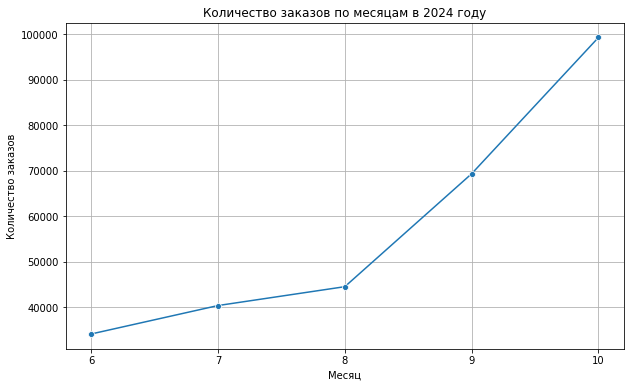

In [22]:
# Выберем 2024 год
df_filt['year'] = df_filt['created_dt_msk'].dt.year
df_2024 = df_filt[df_filt['year'] == 2024]

# Посчитаем количество заказов по месяцам
orders_per_month = df_2024.groupby('month')['order_id'].count().reset_index(name='orders_count')

# Как увеличивается количество заказов с июня по октябрь
print(orders_per_month[(orders_per_month['month'] >= 6) & (orders_per_month['month'] <= 10)])

# Оставим только месяцы с заказами
orders_per_month_nonzero = orders_per_month[orders_per_month['orders_count'] > 0]

# Линейная диаграмма количества заказов по месяцам 
plt.figure(figsize=(10,6))
sns.lineplot(data=orders_per_month_nonzero, x='month', y='orders_count', marker='o')
plt.title('Количество заказов по месяцам в 2024 году')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(orders_per_month_nonzero['month'])
plt.grid(True)
plt.show()

Тренд показывает устойчивый рост числа заказов с каждым месяцем, особенно заметный скачок в сентябре и октябре.

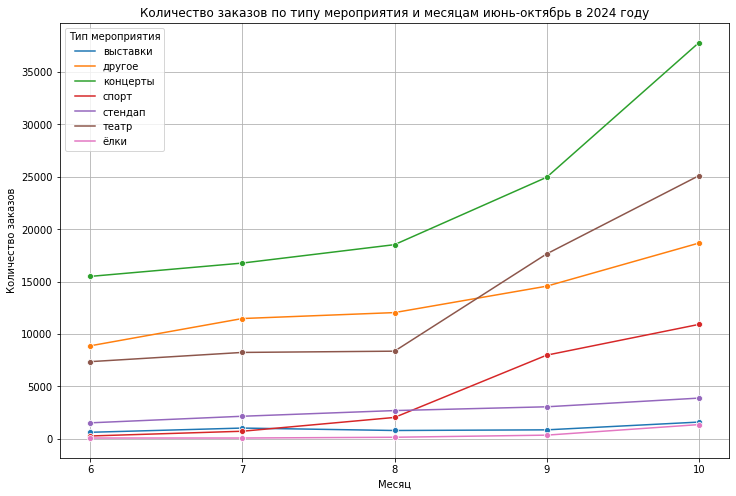

In [23]:
# Анализ динамики пользовательской активности по типу мероприятия:
orders_by_event_type = df_2024.groupby(['month', 'event_type_main'])['order_id'].count().reset_index()

# Фильтр по месяцам июнь-октябрь
orders_by_event_type_filtered = orders_by_event_type[
    (orders_by_event_type['month'] >= 6) & (orders_by_event_type['month'] <= 10)]

# Исключим строки с нулевыми заказами
orders_by_event_type_filtered = orders_by_event_type_filtered[orders_by_event_type_filtered['order_id'] > 0]
                                                              
plt.figure(figsize=(12,8))
sns.lineplot(data=orders_by_event_type_filtered, x='month', y='order_id', hue='event_type_main', marker='o')
plt.title('Количество заказов по типу мероприятия и месяцам июнь-октябрь в 2024 году')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(6, 11))
plt.legend(title='Тип мероприятия')
plt.grid(True)
plt.show()

- Концерты (зеленая линия) демонстрируют самый сильный рост заказов, особенно заметный в последние месяцы, что говорит о высокой популярности данного типа мероприятий.
- Другое (оранжевая линия) и спорт (коричневая линия) также показывают устойчивый рост, при этом спорт резко набирает популярность ближе к концу периода.
- Выставки, стендап, театр и ёлки имеют значительно меньший объем заказов и более плавный, менее выраженный рост.

В целом, наибольший интерес и рост спроса сосредоточен вокруг концертов, спорта и категории "другое".
Таким образом, можно сделать вывод, что концерты и спортивные мероприятия являются наиболее востребованными и быстрорастущими сегментами на рынке событий в рассматриваемый период.

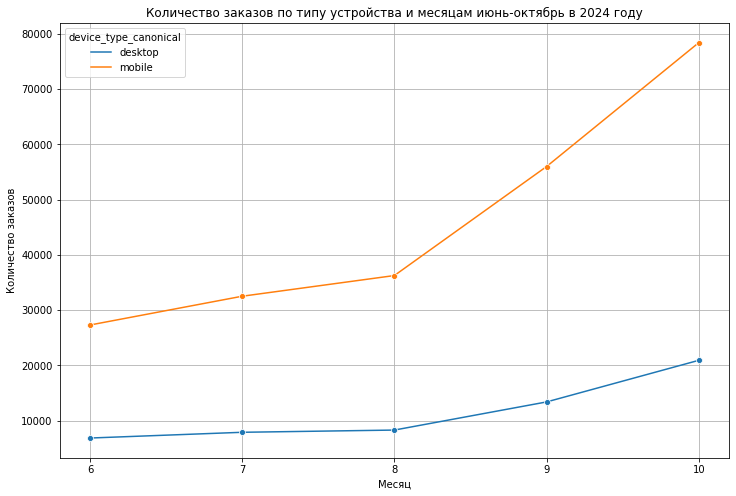

In [24]:
# Анализ динамики пользовательской активности по типу устройства:
orders_by_device = df_2024.groupby(['month', 'device_type_canonical'])['order_id'].count().reset_index()

# Фильтр по месяцам июнь-октябрь
orders_by_device = orders_by_device[(orders_by_device['month'] >= 6) & (orders_by_device['month'] <= 10)]

# Исключим строки с нулевыми заказами
orders_by_device = orders_by_device[orders_by_device['order_id'] > 0]

plt.figure(figsize=(12,8))
sns.lineplot(data=orders_by_device, x='month', y='order_id', hue='device_type_canonical', marker='o')
plt.title('Количество заказов по типу устройства и месяцам июнь-октябрь в 2024 году')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(6, 11))
plt.grid(True)
plt.show()

- Заказы с мобильных устройств (оранжевая линия) значительно превышают заказы с десктопов (синяя линия) на протяжении всего периода.
- При этом рост заказов с мобильных устройств более резкий и выраженный, особенно в последние месяцы.
- Заказы с десктопов тоже растут, но темпы роста заметно ниже и общий объем меньше.
- Это свидетельствует о том, что пользователи все активнее используют мобильные устройства для оформления заказов на мероприятия, и мобильный трафик становится доминирующим каналом.

Таким образом, для маркетинговых и технических стратегий важно уделять приоритетное внимание мобильной платформе, учитывая её растущую значимость.

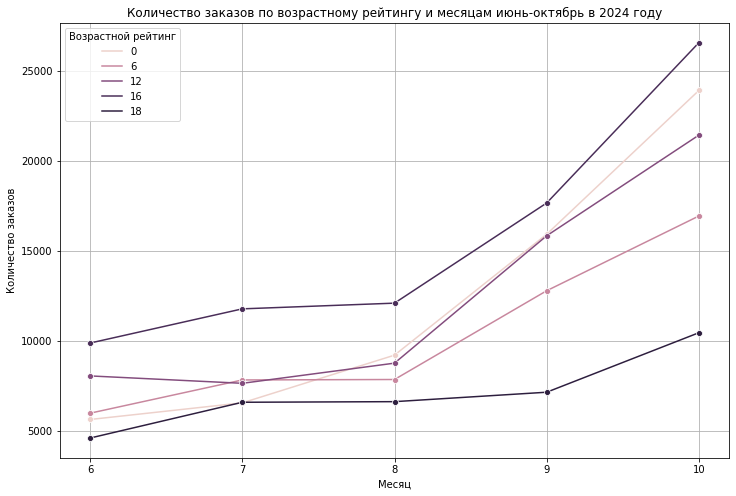

In [25]:
# Анализ динамики пользовательской активности по возрастному рейтингу:
orders_by_age_limit = df_2024.groupby(['month', 'age_limit'])['order_id'].count().reset_index()

# Фильтр по месяцам июнь-октябрь
orders_by_age_limit = orders_by_age_limit[(orders_by_age_limit['month'] >= 6) & (orders_by_age_limit['month'] <= 10)]

# Исключим строки с нулевыми заказами
orders_by_age_limit = orders_by_age_limit[orders_by_age_limit['order_id'] > 0]

plt.figure(figsize=(12,8))
sns.lineplot(data=orders_by_age_limit, x='month', y='order_id', hue='age_limit', marker='o')
plt.title('Количество заказов по возрастному рейтингу и месяцам июнь-октябрь в 2024 году')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(6, 11))  # Показываем только месяцы с июня по октябрь
plt.legend(title='Возрастной рейтинг')
plt.grid(True)
plt.show()

- Наибольший рост заказов наблюдается для мероприятий с возрастными рейтингами 16 и 18, особенно заметно увеличение в последние месяцы.
- Мероприятия с рейтингом 0, 6 и 12 показывают более умеренный и плавный рост.
- Это указывает на повышенный интерес аудитории к более взрослым и, вероятно, более насыщенным или специфичным событиям.
- Рост заказов по возрастным рейтингам 16 и 18 может быть связан с увеличением предложения или спроса на мероприятия с ограничением по возрасту.
В целом, можно сказать, что сегмент мероприятий с возрастными ограничениями 16+ становится всё более востребованным, что важно учитывать при планировании маркетинговых кампаний и формировании ассортимента.

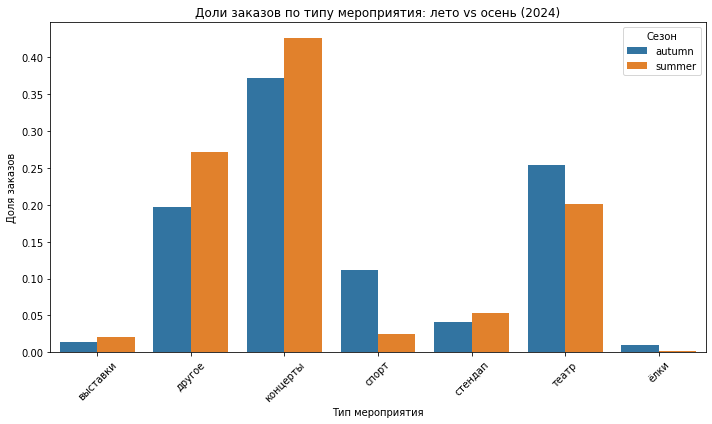

In [26]:
# Добавим колонку с сезоном
def assign_season(month):
    if month in [6,7,8]:
        return 'summer'
    elif month in [9,10]:
        return 'autumn'
    else:
        return None

df_2024['season'] = df_2024['month'].apply(assign_season)
df_seasons = df_2024[df_2024['season'].notna()]

# Функция для расчёта долей заказов по категории и сезону
def calc_shares(df, category):
    grouped = df.groupby(['season', category])['order_id'].count().reset_index(name='orders_count')
    total_per_season = grouped.groupby('season')['orders_count'].transform('sum')
    grouped['share'] = grouped['orders_count'] / total_per_season
    return grouped

# Рассчитаем доли по каждой категории
shares_type_event = calc_shares(df_seasons, 'event_type_main')
shares_device_type = calc_shares(df_seasons, 'device_type_canonical')
shares_age_limit = calc_shares(df_seasons, 'age_limit')

# Столбчатая диаграмма доли заказов по типу мероприятия: лето vs осень (2024)
plt.figure(figsize=(10,6))
sns.barplot(data=shares_type_event, x='event_type_main', y='share', hue='season')
plt.ylabel('Доля заказов')
plt.xlabel('Тип мероприятия')
plt.title('Доли заказов по типу мероприятия: лето vs осень (2024)')
plt.xticks(rotation=45)
plt.legend(title='Сезон')
plt.tight_layout()
plt.show()

- Летом доля заказов выше для некоторых категорий, таких как выставки, концерты, стендап.
- Осенью больше доля у других категорий(спорт, театр, елки).

Это может свидетельствовать о сезонных предпочтениях в типах мероприятий.

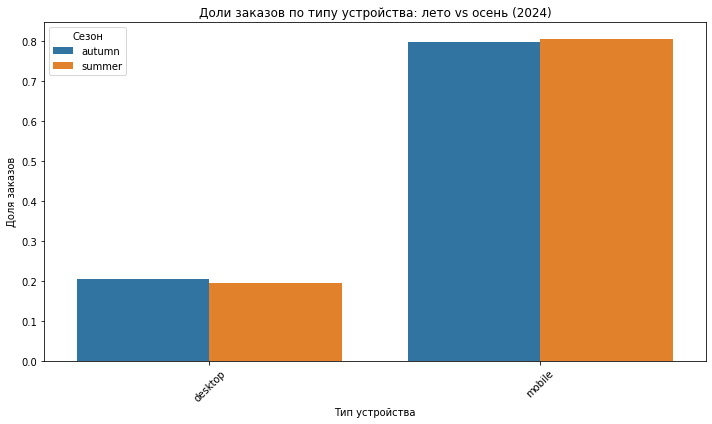

season device_type_canonical   autumn    summer  relative_change_%
0                    desktop  0.20342  0.193585           5.080883
1                     mobile  0.79658  0.806415          -1.219696


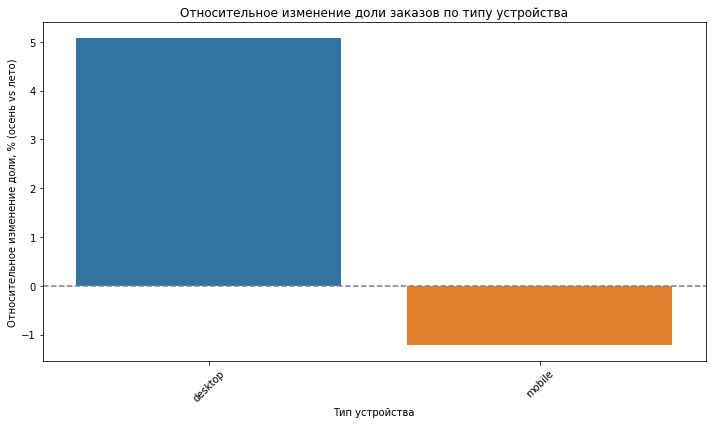

In [27]:
# Доли заказов по типу устройства: лето vs осень (2024)
plt.figure(figsize=(10,6))
sns.barplot(data=shares_device_type, x='device_type_canonical', y='share', hue='season')
plt.ylabel('Доля заказов')
plt.xlabel('Тип устройства')
plt.title('Доли заказов по типу устройства: лето vs осень (2024)')
plt.xticks(rotation=45)
plt.legend(title='Сезон')
plt.tight_layout()
plt.show()

def calc_relative_change(shares_df, category_col):
    pivot = shares_df.pivot(index=category_col, columns='season', values='share').reset_index()
    pivot['relative_change_%'] = 100 * (pivot['autumn'] - pivot['summer']) / pivot['summer']
    return pivot


relative_change_device = calc_relative_change(shares_device_type, 'device_type_canonical')
print(relative_change_device)

plt.figure(figsize=(10,6))
sns.barplot(data=relative_change_device, x='device_type_canonical', y='relative_change_%')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Относительное изменение доли, % (осень vs лето)')
plt.xlabel('Тип устройства')
plt.title('Относительное изменение доли заказов по типу устройства')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Доли двух основных категорий устройств примерно равны между летом и осенью.
Возможно, тип устройства не сильно зависит от сезона.

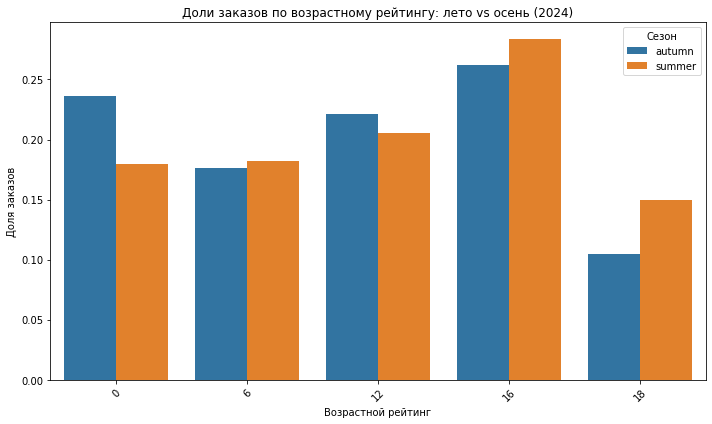

season  age_limit    autumn    summer  relative_change_%
0               0  0.236184  0.179683          31.445121
1               6  0.176243  0.181941          -3.131921
2              12  0.220974  0.205371           7.597273
3              16  0.262212  0.283376          -7.468584
4              18  0.104388  0.149629         -30.235830


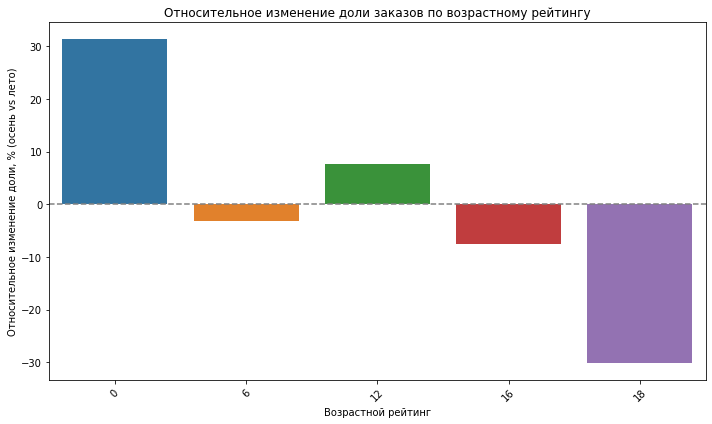

In [28]:
# Столбчатая диаграмма Доли заказов по возрастному рейтингу
plt.figure(figsize=(10,6))
sns.barplot(data=shares_age_limit, x='age_limit', y='share', hue='season')
plt.ylabel('Доля заказов')
plt.xlabel('Возрастной рейтинг')
plt.title('Доли заказов по возрастному рейтингу: лето vs осень (2024)')
plt.xticks(rotation=45)
plt.legend(title='Сезон')
plt.tight_layout()
plt.show()

#  Относительного изменения
relative_change_age = calc_relative_change(shares_age_limit, 'age_limit')
print(relative_change_age)

plt.figure(figsize=(10,6))
sns.barplot(data=relative_change_age, x='age_limit', y='relative_change_%')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Относительное изменение доли, % (осень vs лето)')
plt.xlabel('Возрастной рейтинг')
plt.title('Относительное изменение доли заказов по возрастному рейтингу')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Видно, что для некоторых возрастных категорий летом доля заказов выше, для других — осенью.
Разница не очень большая, но есть тенденция к небольшим сезонным колебаниям.

season event_type_main      autumn      summer  relative_change_%
0             выставки   90.603607   86.416199           4.845629
1               другое   80.452744   81.974113          -1.855915
2             концерты  279.100494  430.674103         -35.194504
3                спорт   53.926430   55.172066          -2.257730
4              стендап  231.124969  219.073166           5.501269
5                театр  175.969513  214.194122         -17.845779
6                 ёлки  229.585587  271.436188         -15.418210


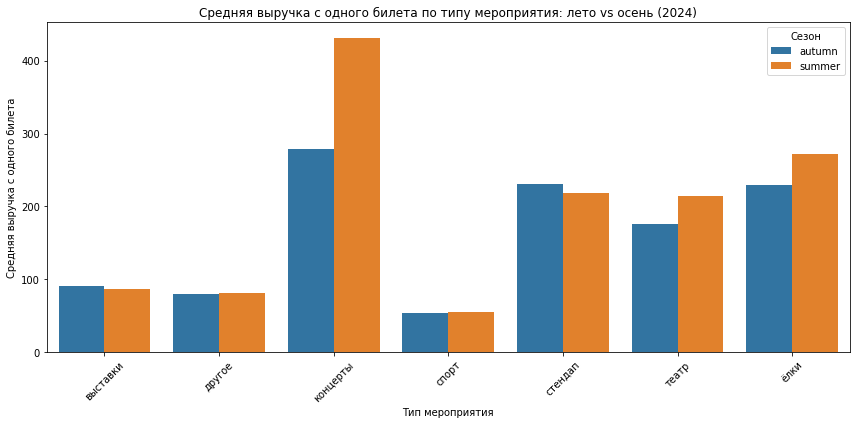

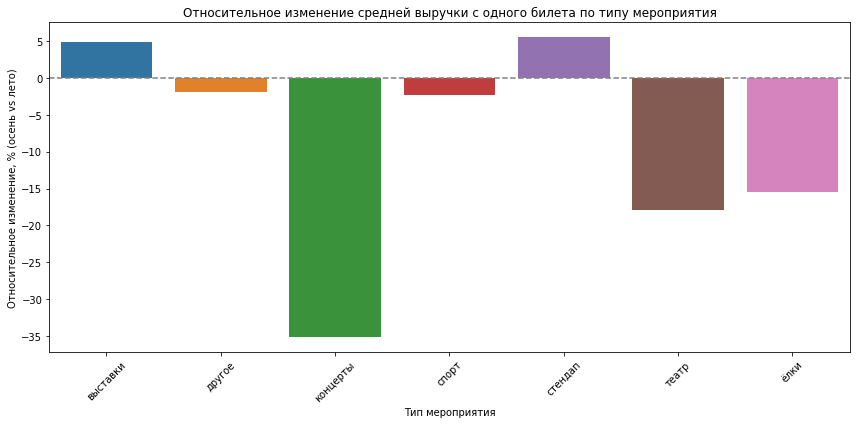

In [29]:
# Рассчитаем среднюю выручку с одного билета по типу мероприятия и сезону
df_seasons = df_seasons.copy()
df_seasons['revenue_per_ticket'] = df_seasons['revenue'] / df_seasons['tickets_count']

mean_revenue = df_seasons.groupby(['season', 'event_type_main'])['revenue_per_ticket'].mean().reset_index()

# Таблица для удобства сравнения
mean_revenue_pivot = mean_revenue.pivot(index='event_type_main', columns='season', values='revenue_per_ticket').reset_index()

# Рассчитаем относительное изменение (осень относительно лета)
mean_revenue_pivot['relative_change_%'] = 100 * (mean_revenue_pivot['autumn'] - mean_revenue_pivot['summer']) / mean_revenue_pivot['summer']

print(mean_revenue_pivot)

# Столбчатая диаграмма средней выручки по сезонам
plt.figure(figsize=(12,6))
sns.barplot(data=mean_revenue, x='event_type_main', y='revenue_per_ticket', hue='season')
plt.xticks(rotation=45)
plt.ylabel('Средняя выручка с одного билета')
plt.xlabel('Тип мероприятия')
plt.title('Средняя выручка с одного билета по типу мероприятия: лето vs осень (2024)')
plt.legend(title='Сезон')
plt.tight_layout()
plt.show()

# Относительного изменения
plt.figure(figsize=(12,6))
sns.barplot(data=mean_revenue_pivot, x='event_type_main', y='relative_change_%')
plt.xticks(rotation=45)
plt.ylabel('Относительное изменение, % (осень vs лето)')
plt.xlabel('Тип мероприятия')
plt.title('Относительное изменение средней выручки с одного билета по типу мероприятия')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

Положительная динамика (рост средней стоимости билета осенью):
- Выставки (+4.85%)
- Стендап (+5.50%)

Отрицательная динамика (снижение средней стоимости билета осенью):
- Концерты (-35.19%) — значительное снижение
- Театр (-17.84%)
- Ёлки (-15.42%)
- Спорт (-2.25%)
- Другое (-1.86%)

Средняя стоимость билета по типам и сезонам:
- Видно, что для большинства категорий средняя стоимость билета летом выше, чем осенью. Особенно заметно это для концертов и театра, где осенние цены существенно ниже летних. Исключения — выставки и стендап, где осенью билеты стали немного дороже.

Относительное изменение в %:
- Подтверждает выводы из таблицы — значительное падение стоимости билетов на концерты, театр и ёлки осенью, а также небольшой рост для выставок и стендапа.

В целом, осенью наблюдается тенденция к снижению средней стоимости билетов в большинстве категорий, что может быть связано с сезонным снижением спроса или изменением ценовой политики. Исключение составляют выставки и стендап, где средняя цена билета выросла.

Возможные причины изменений:
- Сезонность спроса (осенью меньше мероприятий или меньше зрителей на концертах и театрах).
- Изменение ассортимента мероприятий (например, менее дорогие концерты осенью).
- Акции и скидки в осенний период.
- Особенности мероприятия (например, ёлки — сезонные события с фиксированной датой).

### Осенняя активность пользователей

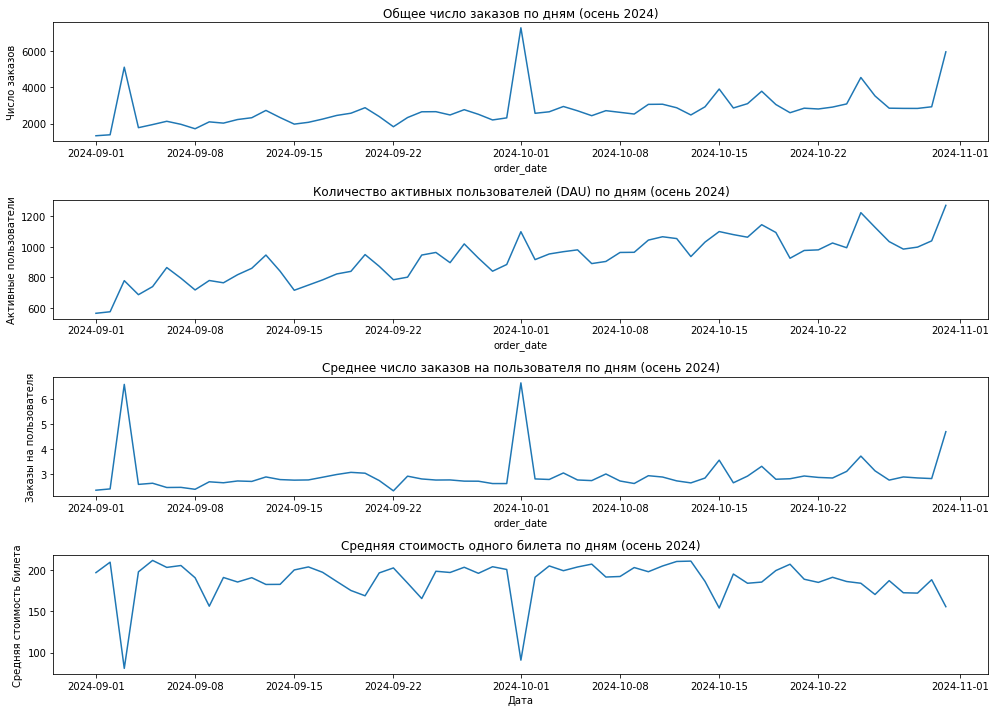

In [30]:
# Фильтруем только осенние данные
df_autumn = df_seasons[df_seasons['season'] == 'autumn'].copy()
df_autumn['order_date'] = pd.to_datetime(df_autumn['order_date'])
# Cводная таблица по дням 
daily_stats = df_autumn.groupby('order_date').agg(
    orders_count=('order_id', 'count'),
    unique_users=('user_id', 'nunique'),
    revenue=('revenue', 'sum'),
    tickets_count=('tickets_count', 'sum') ).reset_index()

daily_stats['orders_per_user'] = daily_stats['orders_count'] / daily_stats['unique_users']
daily_stats['avg_ticket_price'] = daily_stats['revenue'] / daily_stats['tickets_count']

plt.figure(figsize=(14, 10))

# Линейная диаграмма Общее число заказов по дням
plt.subplot(4, 1, 1)
sns.lineplot(data=daily_stats, x='order_date', y='orders_count')
plt.title('Общее число заказов по дням (осень 2024)')
plt.ylabel('Число заказов')

# Количество активных пользователей (DAU) по дням
plt.subplot(4, 1, 2)
sns.lineplot(data=daily_stats, x='order_date', y='unique_users')
plt.title('Количество активных пользователей (DAU) по дням (осень 2024)')
plt.ylabel('Активные пользователи')

# Среднее число заказов на пользователя по дням
plt.subplot(4, 1, 3)
sns.lineplot(data=daily_stats, x='order_date', y='orders_per_user')
plt.title('Среднее число заказов на пользователя по дням (осень 2024)')
plt.ylabel('Заказы на пользователя')

# Средняя стоимость одного билета по дням
plt.subplot(4, 1, 4)
sns.lineplot(data=daily_stats, x='order_date', y='avg_ticket_price')
plt.title('Средняя стоимость одного билета по дням (осень 2024)')
plt.ylabel('Средняя стоимость билета')
plt.xlabel('Дата')

plt.tight_layout()
plt.show()

- Общее число заказов (первый график) показывает выраженные колебания с некоторыми пиками, особенно в отдельные дни, и общим трендом на рост к концу периода. Это говорит о сезонных или событийных всплесках активности.
- Количество активных пользователей (DAU) (второй график) демонстрирует более плавный и стабильный рост во времени, что свидетельствует о постепенном увеличении базы пользователей.
- Среднее число заказов на одного пользователя (третий график) колеблется, но в целом держится на уровне около 3 заказов на пользователя, с редкими всплесками. Это указывает на стабильное поведение пользователей в плане частоты заказов.
- Средняя стоимость одного билета (четвертый график) относительно стабильна, с некоторым снижением в отдельные дни, что может быть связано с изменением ассортимента или скидками.


   day_type   avg_orders    avg_users  avg_orders_per_user  avg_ticket_price
0    Будний  2390.555556   853.666667             2.780350        188.562012
1    Будний  3498.888889   934.555556             3.722218        158.977890
2    Будний  2543.444444   923.555556             2.752209        193.423019
3    Будний  3018.555556   962.111111             3.064152        189.661621
4    Будний  3104.375000  1022.625000             3.003061        191.846008
5  Выходной  2667.750000   961.000000             2.761382        196.006287
6  Выходной  2154.555556   822.777778             2.598522        201.171555


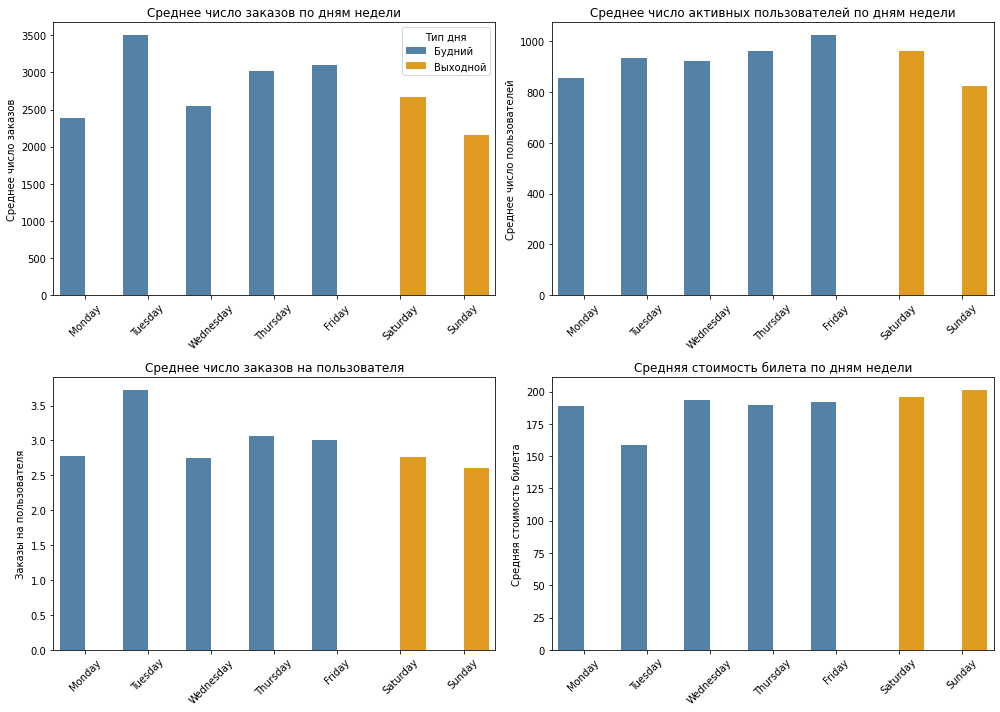

In [31]:
# Добавляем день недели и номер дня недели
daily_stats['day_of_week'] = daily_stats['order_date'].dt.day_name()
daily_stats['weekday_num'] = daily_stats['order_date'].dt.dayofweek

# Определяем тип дня: будний или выходной
daily_stats['day_type'] = daily_stats['weekday_num'].apply(lambda x: 'Будний' if x < 5 else 'Выходной')

# Список дней недели в правильном порядке
order_days = (
    daily_stats[['day_of_week', 'weekday_num']]
    .drop_duplicates()
    .sort_values('weekday_num')['day_of_week']
    .tolist() )

# Группировка по дню недели, среднее
weekly_agg = daily_stats.groupby(['weekday_num', 'day_of_week'], as_index=False).agg(
    avg_orders=('orders_count', 'mean'),
    avg_users=('unique_users', 'mean'),
    avg_orders_per_user=('orders_per_user', 'mean'),
    avg_ticket_price=('avg_ticket_price', 'mean'))


day_type_df = daily_stats[['day_of_week', 'day_type']].drop_duplicates()
weekly_summary = weekly_agg.merge(day_type_df, on='day_of_week', how='left')

print(weekly_summary[['day_type', 'avg_orders', 'avg_users', 'avg_orders_per_user', 'avg_ticket_price']])

# Палитра для будних и выходных
palette = {'Будний': 'steelblue', 'Выходной': 'orange'}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

sns.barplot(data=weekly_summary, x='day_of_week', y='avg_orders', ax=axes[0], order=order_days, hue='day_type', palette=palette)
axes[0].set_title('Среднее число заказов по дням недели')
axes[0].set_ylabel('Среднее число заказов')
axes[0].legend(title='Тип дня')

sns.barplot(data=weekly_summary, x='day_of_week', y='avg_users', ax=axes[1], order=order_days, hue='day_type', palette=palette)
axes[1].set_title('Среднее число активных пользователей по дням недели')
axes[1].set_ylabel('Среднее число пользователей')
axes[1].legend_.remove()

sns.barplot(data=weekly_summary, x='day_of_week', y='avg_orders_per_user', ax=axes[2], order=order_days, hue='day_type', palette=palette)
axes[2].set_title('Среднее число заказов на пользователя')
axes[2].set_ylabel('Заказы на пользователя')
axes[2].legend_.remove()

sns.barplot(data=weekly_summary, x='day_of_week', y='avg_ticket_price', ax=axes[3], order=order_days, hue='day_type', palette=palette)
axes[3].set_title('Средняя стоимость билета по дням недели')
axes[3].set_ylabel('Средняя стоимость билета')
axes[3].legend_.remove()

for ax in axes:
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- В будние дни наблюдается более высокая активность пользователей — на 20% больше заказов и примерно на 6% больше уникальных пользователей, чем в выходные.
- Среднее число заказов на пользователя в будни выше (3.07 против 2.68), что свидетельствует о более интенсивном использовании сервиса в рабочие дни.
- В то же время, средняя стоимость билета выше в выходные (около 199 против 184 в будни), что может указывать на предпочтение более дорогих мероприятий или билетов в выходные дни.

- По столбчатым графикам видно, что активность (число заказов и пользователей) имеет выраженные пики в середине недели (вторник, среда, четверг).
- В понедельник и воскресенье активность заметно ниже.
- Средняя стоимость билета показывает обратную тенденцию — она выше в выходные и немного ниже в будни, что подтверждает вывод о более дорогих билетах в выходные.

Пользовательская активность и количество заказов выше в будние дни, что может быть связано с рабочим графиком и планированием досуга.

В выходные наблюдается снижение активности, но при этом растёт средний чек, что говорит о покупке более дорогих билетов или посещении более премиальных мероприятий.

Недельная цикличность выражена чётко: пики активности приходятся на середину недели, минимумы — на начало и конец.

Для повышения эффективности маркетинговых кампаний стоит учитывать эти особенности: в будни — фокус на увеличение количества заказов и пользователей, в выходные — на повышение среднего чека и продвижение дорогих категорий билетов.

### Популярные события и партнёры

In [32]:
# Общее число уникальных мероприятий и заказов в осеннем срезе
total_unique_events = df_autumn['event_id'].nunique()
total_orders = df_autumn['order_id'].count()
total_revenue = df_autumn['revenue'].sum()

# Анализ по регионам
region_events = df_autumn.groupby('region_name')['event_id'].nunique().reset_index(name='unique_events')
region_orders = df_autumn.groupby('region_name')['order_id'].count().reset_index(name='orders_count')

region_summary = region_events.merge(region_orders, on='region_name')

region_summary['events_share'] = region_summary['unique_events'] / total_unique_events
region_summary['orders_share'] = region_summary['orders_count'] / total_orders

region_summary = region_summary.sort_values(by='unique_events', ascending=False)

print("Регионы с наибольшим разнообразием мероприятий и объёмом заказов:")
print(region_summary.head(10))

Регионы с наибольшим разнообразием мероприятий и объёмом заказов:
                region_name  unique_events  orders_count  events_share  \
23       Каменевский регион           3910         46684      0.246284   
59     Североярская область           2613         20718      0.164588   
75      Широковская область            803          8715      0.050579   
56     Светополянский округ            764          4779      0.048123   
51      Речиновская область            529          3565      0.033321   
60     Серебринская область            456          4467      0.028723   
76      Яблоневская область            432          4199      0.027211   
67     Тепляковская область            419          2485      0.026392   
11     Горицветская область            406          3230      0.025573   
63  Солнечноземская область            403          4228      0.025384   

    orders_share  
23      0.276841  
59      0.122860  
75      0.051681  
56      0.028340  
51      0.021141  
60   

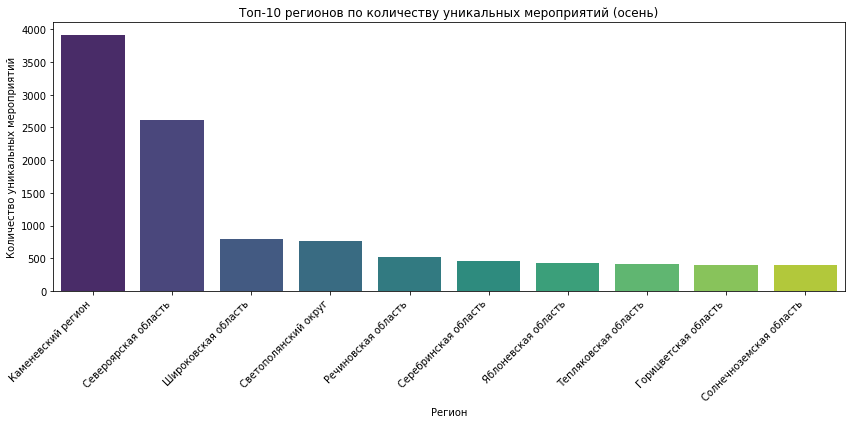

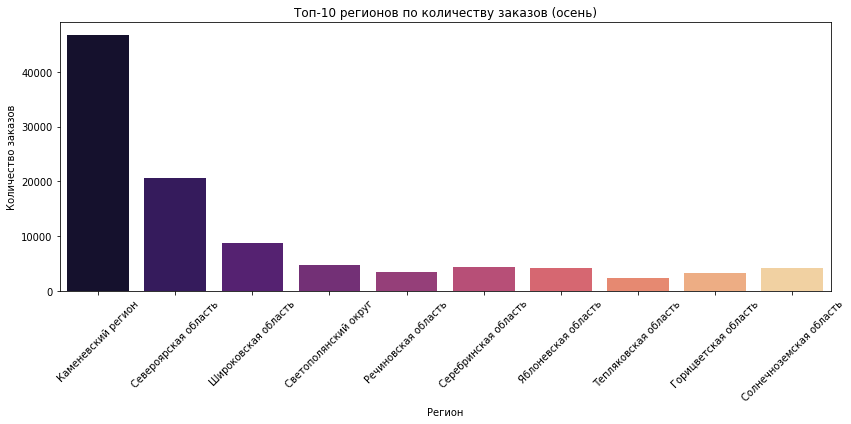

In [33]:
# Топ-10 регионов по уникальным мероприятиям
top_regions_events = region_summary.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions_events, x='region_name', y='unique_events', palette='viridis')
plt.title('Топ-10 регионов по количеству уникальных мероприятий (осень)')
plt.xlabel('Регион')
plt.ylabel('Количество уникальных мероприятий')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()

# Топ-10 регионов по количеству заказов
top_regions_orders = region_summary.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions_orders, x='region_name', y='orders_count', palette='magma')
plt.title('Топ-10 регионов по количеству заказов (осень)')
plt.xlabel('Регион')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Анализ по партнёрам (service_name)
partner_events = df_autumn.groupby('service_name')['event_id'].nunique().reset_index(name='unique_events')
partner_orders = df_autumn.groupby('service_name')['order_id'].count().reset_index(name='orders_count')
partner_revenue = df_autumn.groupby('service_name')['revenue'].sum().reset_index(name='total_revenue')

partner_summary = partner_events.merge(partner_orders, on='service_name').merge(partner_revenue, on='service_name')

partner_summary['events_share'] = partner_summary['unique_events'] / total_unique_events
partner_summary['orders_share'] = partner_summary['orders_count'] / total_orders
partner_summary['revenue_share'] = partner_summary['total_revenue'] / total_revenue

partner_summary = partner_summary.sort_values(by='orders_count', ascending=False)

print("\nНаиболее активные партнёры по количеству заказов и выручке:")
print(partner_summary.head(10))


Наиболее активные партнёры по количеству заказов и выручке:
          service_name  unique_events  orders_count  total_revenue  \
3   Билеты без проблем           2847         32405   1.359507e+07   
21         Лови билет!           3616         25794   1.038194e+07   
5        Билеты в руки           2469         25728   7.613384e+06   
24           Мой билет           1005         19416   1.163675e+07   
25             Облачко           1409         15478   1.061105e+07   
22       Лучшие билеты           1396         12432   1.676010e+06   
8       Весь в билетах            599          9416   9.351279e+06   
26           Прачечная            728          5798   2.548310e+06   
30         Тебе билет!            859          3760   2.166179e+06   
34              Яблоко            537          3473   2.763332e+06   

    events_share  orders_share  revenue_share  
3       0.179327      0.192165       0.161527  
21      0.227765      0.152961       0.123351  
5       0.155518      0.

Регионы с наибольшим разнообразием мероприятий и объёмом заказов:
- Каменевский регион — лидер по количеству уникальных мероприятий (3910, почти 25% от всех) и по заказам (46681, около 28% от всех заказов). Это ключевой регион с широкой и активной культурной жизнью.
- Североярская область — второй по активности регион с 2613 мероприятиями и 20718 заказами, что составляет примерно 16% и 12% от общего объёма.
- Далее идут регионы с существенно меньшим числом уникальных событий и заказов, но всё ещё заметным вкладом (например, Широковская область, Светополянский округ и др.).
- Видно, что топ-2 региона концентрируют значительную долю и разнообразие мероприятий, а остальные регионы имеют более нишевую или локальную активность.

Для стратегического развития стоит ориентироваться в первую очередь на Каменевский регион и Североярскую область — там и выбор событий шире, и спрос выше. Остальные регионы можно рассматривать как перспективные для расширения, но с меньшим текущим влиянием.

Наиболее активные партнёры по количеству заказов и выручке:
- «Билеты без проблем» — крупнейший партнёр по заказам (32404) и выручке (~13.6 млн), обрабатывает почти 18% всех уникальных мероприятий.
- «Лови билет!» — обрабатывает больше уникальных событий (3616), но чуть меньше заказов и выручки, около 12% от общего оборота.
- «Билеты в руки» и «Мой билет» — также крупные игроки с высокой выручкой и заказами.
- «Мой билет» имеет относительно меньше уникальных мероприятий, но высокую выручку — возможно, специализируется на более дорогих или премиальных событиях.
- Остальные партнёры имеют меньшую долю рынка, но всё равно вносят заметный вклад.

Рынок билетных партнёров достаточно концентрирован — топ-4-5 партнёров контролируют значительную часть заказов и выручки. Для повышения продаж и оптимизации процессов стоит работать в первую очередь с этими крупными партнёрами, а также анализировать возможности расширения сотрудничества с перспективными средними игроками.

## 4. Статистический анализ данных

1 Гипотеза: 

**Среднее количество заказов на одного пользователя мобильного приложения выше, чем у пользователей стационарных устройств.**

Нулевая гипотеза `H0: μ mobile = μ desktop` 
Среднее количество заказов на пользователя в мобильной группе равно среднему в стационарной группе.

Альтернативная гипотеза `H1: μ mobile > μ desktop` 
Среднее количество заказов на пользователя в мобильной группе выше, чем в стационарной группе.

In [35]:
# Количество заказов на пользователя
orders_per_user = df_autumn.groupby(['user_id', 'device_type_canonical'])['order_id'].count().reset_index(name='orders_count')

# Разделим группы
mobile_orders = orders_per_user[orders_per_user['device_type_canonical'] == 'mobile']['orders_count']
desktop_orders = orders_per_user[orders_per_user['device_type_canonical'] == 'desktop']['orders_count']

# Найдем количество пользователей, сделавших заказы с мобильных устройств
num_mobile_users = mobile_orders.shape[0]
print(f"Число пользователей в мобильной выборке: {num_mobile_users}")

# Подсчитаем количество пользователей, сделавших заказы с десктопов
num_desktop_users = desktop_orders.shape[0]
print(f"Число пользователей в десктопной выборке: {num_desktop_users}")

Число пользователей в мобильной выборке: 14192
Число пользователей в десктопной выборке: 4868


Количество пользователей, присутствующих в обеих группах: 3249
Размер мобильной выборки после фильтрации: 10943
Размер десктопной выборки после фильтрации: 1619


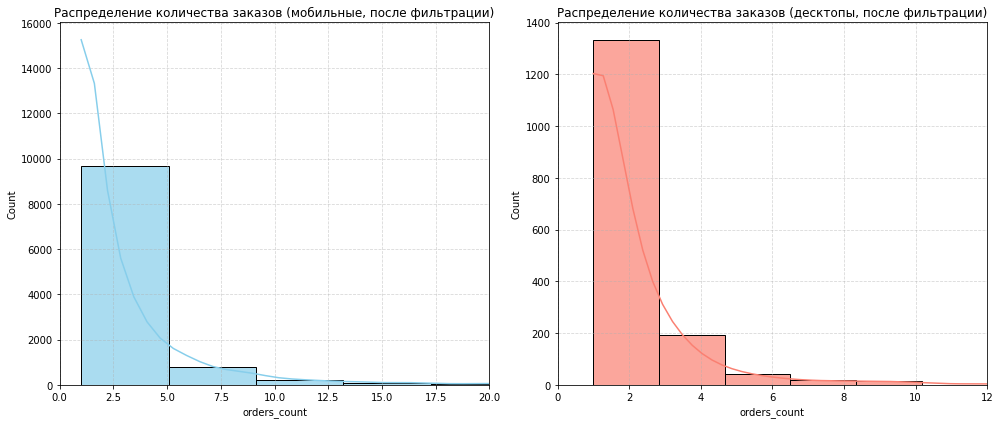

In [36]:
#Количество пользователей, присутствующих в обеих группах
mobile_users = set(orders_per_user[orders_per_user['device_type_canonical'] == 'mobile']['user_id'])
desktop_users = set(orders_per_user[orders_per_user['device_type_canonical'] == 'desktop']['user_id'])

common_users = mobile_users.intersection(desktop_users)
print(f"Количество пользователей, присутствующих в обеих группах: {len(common_users)}")

# Отфильтруем данные, исключая общих пользователей
orders_filtered = orders_per_user[~orders_per_user['user_id'].isin(common_users)]

# Новые выборки
mobile_orders_filtered = orders_filtered[orders_filtered['device_type_canonical'] == 'mobile']['orders_count']
desktop_orders_filtered = orders_filtered[orders_filtered['device_type_canonical'] == 'desktop']['orders_count']

print(f"Размер мобильной выборки после фильтрации: {mobile_orders_filtered.shape[0]}")
print(f"Размер десктопной выборки после фильтрации: {desktop_orders_filtered.shape[0]}")

# Проверим нормальность на графиках
plt.figure(figsize=(14,6))

# Ограничим диапазон по оси X, например, до 99-го процентили, чтобы убрать выбросы
xlim_mobile = np.percentile(mobile_orders_filtered, 99)
xlim_desktop = np.percentile(desktop_orders_filtered, 99)

plt.subplot(1,2,1)
sns.histplot(mobile_orders_filtered, bins=30, kde=True, color='skyblue', alpha=0.7)
plt.title('Распределение количества заказов (мобильные, после фильтрации)')
plt.xlim(0, xlim_mobile)
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1,2,2)
sns.histplot(desktop_orders_filtered, bins=30, kde=True, color='salmon', alpha=0.7)
plt.title('Распределение количества заказов (десктопы, после фильтрации)')
plt.xlim(0, xlim_desktop)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Для сравнения групп лучше использовать непараметрические методы (тест Манна-Уитни), которые не требуют нормальности данных.

Распределения явно не нормальные — они сильно скошены вправо, с большим числом нулевых или малых значений и длинным «хвостом» справа.
Это подтверждает необходимость использовать непараметрический тест Манна-Уитни для сравнения средних.

In [37]:
# Тест Манна-Уитни
alpha = 0.05
stat, p_value = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')
print(f"Манна-Уитни тест: статистика = {stat}, p-value = {p_value:.4f}")

Манна-Уитни тест: статистика = 36111903.0, p-value = 0.0000


При уровне значимости (например, 0.05) мы отвергаем нулевую гипотезу H0 и принимаем альтернативную гипотезу H1: среднее количество заказов на пользователя в мобильной выборке статистически значимо больше, чем в десктопной выборке.

Данные подтверждают, что пользователи с мобильных устройств делают больше заказов, чем пользователи с десктопов.

2 Гипотеза: 

**Среднее время между заказами пользователей мобильных приложений выше, чем у пользователей стационарных устройств.**

Нулевая гипотеза `H0: μ mobile = μ desktop` 
Среднее время между заказами в мобильной группе равно среднему в стационарной группе.

Альтернативная гипотеза `H1: μ mobile > μ desktop`
Среднее время между заказами в мобильной группе выше, чем в стационарной группе.


Количество пользователей, присутствующих в обеих группах: 1891
Размер мобильной выборки после фильтрации: 25915
Размер десктопной выборки после фильтрации: 2249


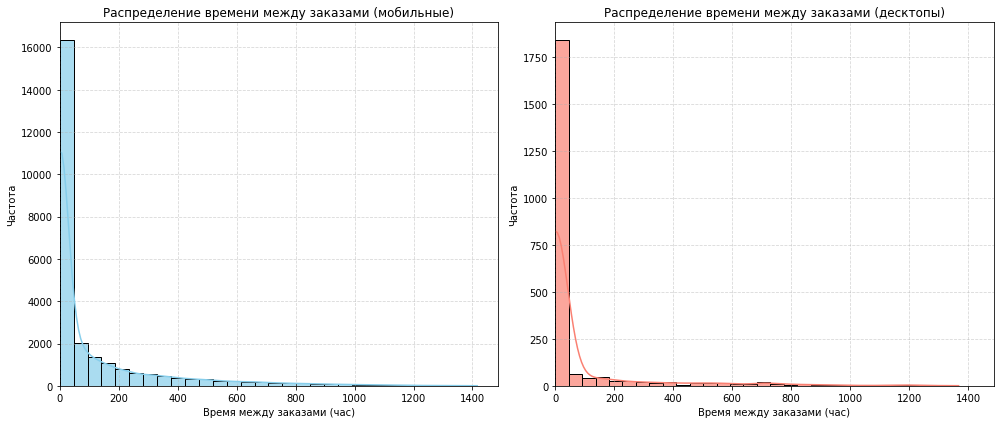

In [38]:
# Данные по пользователю, устройству и времени заказа
df_sorted = df_autumn.sort_values(['user_id', 'device_type_canonical', 'order_date'])

# Группируем и считаем разницу во времени между заказами для каждого пользователя и устройства
df_sorted['time_diff'] = df_sorted.groupby(['user_id', 'device_type_canonical'])['order_date'].diff().dt.total_seconds() / 3600  # время в часах

# Отфильтруем ненулевые значения (первый заказ у пользователя не имеет предыдущего)
time_diffs = df_sorted.dropna(subset=['time_diff'])

# Получим множество пользователей для каждого типа устройства
mobile_users = set(time_diffs[time_diffs['device_type_canonical'] == 'mobile']['user_id'])
desktop_users = set(time_diffs[time_diffs['device_type_canonical'] == 'desktop']['user_id'])

# Пересекающиеся пользователи
common_users = mobile_users.intersection(desktop_users)
print(f"Количество пользователей, присутствующих в обеих группах: {len(common_users)}")

# Исключим общих пользователей
time_diffs_filtered = time_diffs[~time_diffs['user_id'].isin(common_users)]

# Новые выборки по устройствам
mobile_time_diffs_filtered = time_diffs_filtered[time_diffs_filtered['device_type_canonical'] == 'mobile']['time_diff']
desktop_time_diffs_filtered = time_diffs_filtered[time_diffs_filtered['device_type_canonical'] == 'desktop']['time_diff']

print(f"Размер мобильной выборки после фильтрации: {mobile_time_diffs_filtered.shape[0]}")
print(f"Размер десктопной выборки после фильтрации: {desktop_time_diffs_filtered.shape[0]}")

# Проверим нормальность на графиках
plt.figure(figsize=(14, 6))

# Определим границы по оси X
xlim_mobile = mobile_time_diffs_filtered.max() * 1.05
xlim_desktop = desktop_time_diffs_filtered.max() * 1.05
xlim = max(xlim_mobile, xlim_desktop)

plt.subplot(1, 2, 1)
sns.histplot(mobile_time_diffs_filtered, bins=30, kde=True, color='skyblue', alpha=0.7)
plt.title('Распределение времени между заказами (мобильные)')
plt.xlim(0, xlim)
plt.xlabel('Время между заказами (час)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
sns.histplot(desktop_time_diffs_filtered, bins=30, kde=True, color='salmon', alpha=0.7)
plt.title('Распределение времени между заказами (десктопы)')
plt.xlim(0, xlim)
plt.xlabel('Время между заказами (час)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Графики подтверждают, что распределения схожи по форме и скошены вправо. Распределения времени между заказами для обеих групп сильно отклоняются от нормального — значит, применим непараметрический тест Манна-Уитни.

In [39]:
# Тест Манна-Уитни
alpha = 0.05
stat, p_value = mannwhitneyu(mobile_time_diffs_filtered, desktop_time_diffs_filtered, alternative='greater')
print(f"Манна-Уитни тест: статистика = {stat}, p-value = {p_value:.4f}")

Манна-Уитни тест: статистика = 35500720.0, p-value = 0.0000


Значение p-value значительно меньше уровня значимости 0.05. Следовательно, нулевая гипотеза отвергается в пользу альтернативной гипотезы.

Имеются статистически значимые доказательства того, что среднее время между заказами у пользователей мобильных приложений выше, чем у пользователей стационарных устройств.


## Общий вывод и рекомендации

В ходе анализа была изучена обширная выборка данных по заказам билетов на различные мероприятия, преимущественно в рублях (около 285 тысяч заказов) и в меньшем объёме в тенге (около 5 тысяч заказов). Данные отражают поведение пользователей на российском рынке и включают информацию о количестве билетов, выручке, типах мероприятий, сезонных изменениях, активности по устройствам, региональному распределению и партнёрским каналам.

**Основные результаты анализа:**

*Популярность мероприятий:*
- Наиболее востребованы концерты и спортивные мероприятия, демонстрирующие устойчивый рост заказов, особенно осенью. 
- Категория «Другое» также показывает положительную динамику. Мероприятия с возрастными рейтингами 16 и 18 лет растут быстрее, что указывает на растущий интерес к событиям с возрастными ограничениями.

*Сезонные изменения:*
- Осенью наблюдается снижение средней стоимости билетов на концерты, театр и ёлки, при этом выставки и стендап наоборот подорожали. Это может быть связано с сезонным спросом, изменением ассортимента и ценовой политикой.

*Пользовательская активность:*
- Заказы с мобильных устройств значительно превышают заказы с десктопов и растут быстрее, что подчёркивает важность мобильного канала для продаж. 
- Активность пользователей выше в будние дни, с пиковыми значениями во вторник-четверг. В выходные дни средний чек выше, что говорит о покупке более дорогих билетов.

*Региональные и партнёрские лидеры:*
- Каменевский регион и Североярская область лидируют по количеству мероприятий и заказов, что делает их приоритетными для маркетинговых усилий. 
- Среди партнёров выделяются «Билеты без проблем», «Лови билет!», «Билеты в руки» и «Мой билет», контролирующие значительную долю рынка по заказам и выручке.

*Результаты проверки гипотез:*
- Подтверждена гипотеза о том, что пользователи мобильных устройств делают статистически значимо больше заказов, чем пользователи десктопов.
- Гипотеза о том, что среднее время между заказами у мобильных пользователей выше, чем у десктопных, получила статистическое подтверждение — различия значимы.

**Рекомендации:**
- Уделять приоритетное внимание развитию и оптимизации мобильной платформы, учитывая её доминирующую роль в продажах.
- Фокусироваться на продвижении концертов и спортивных мероприятий, особенно для аудитории 16+ и 18+, с учётом сезонных колебаний спроса.
- Использовать данные о недельной и дневной цикличности активности для планирования маркетинговых кампаний: стимулировать количество заказов в будни и повышать средний чек в выходные.
- Сосредоточить усилия на ключевых регионах (Каменевский и Североярская область) и крупных партнёрах для максимизации охвата и выручки.
- Продолжать мониторинг ценовой политики и ассортимента, особенно в осенний период, чтобы адаптироваться к изменяющимся предпочтениям аудитории.